In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('trades/2011-07.csv')

## Some useful transformations

In [4]:
price_usd = pd.DataFrame(data["Money"]/data["Bitcoins"], columns=['Price_USD'])
data = data.join(price_usd)
import datetime
data["Date"] = pd.to_datetime(data.Date)

In [5]:
data.head()

,Trade_Id,Date,User_Id,Japan,Type,Currency,Bitcoins,Money,Money_Rate,Money_JPY,Money_Fee,Money_Fee_Rate,Money_Fee_JPY,Bitcoin_Fee,Bitcoin_Fee_JPY,Price_USD
0,1309478459355721,2011-07-01 00:00:59,61717,NJP,buy,USD,0.100000,1.61010,80.433128,129.505380,0,80.433128,0,0.0003,0.389795,16.101000
1,1309478459355721,2011-07-01 00:00:59,4125,NJP,sell,USD,0.100000,1.61010,80.433128,129.505380,0,80.433128,0,0.0000,0.000000,16.101000
2,1309478466574560,2011-07-01 00:01:06,57157,NJP,buy,USD,1.000000,16.10098,80.433128,1295.052186,0,80.433128,0,0.0000,0.000000,16.100980
3,1309478466574560,2011-07-01 00:01:06,4125,NJP,sell,USD,1.000000,16.10098,80.433128,1295.052186,0,80.433128,0,0.0000,0.000000,16.100980
4,1309478468980270,2011-07-01 00:01:08,337,NJP,buy,USD,1.705052,27.45300,80.433128,2208.130665,0,80.433128,0,0.0000,0.000000,16.100978


In [6]:
plt.rcParams['figure.figsize'] = (19.0, 12.0)
#plt.plot(data["Date"],data["Price_USD"])

In [7]:
#data[data["Price_USD"] > 5000]

### K = 10

In [8]:
K = 10
from transform import top_K_buyers, top_K_sellers

## Top K buyers

In [9]:
top_buyers = top_K_buyers(data)

## Top K sellers

In [10]:
top_sellers = top_K_sellers(data)

In [11]:
pd.Series(top_sellers)

0        1
1    28856
2     4125
3    16131
4    11003
5     8511
6     2434
7    57157
8     8191
9    17573
dtype: int64

# Buy-Sell Matrix

In [12]:
from transform import buy_sell_matrix
buy_sell_mat = buy_sell_matrix(data)

In [13]:
buy_sell_mat

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Regarder
http://networkx.github.io/

https://networkx.github.io/documentation/latest/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html

http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/

/Users/massil/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


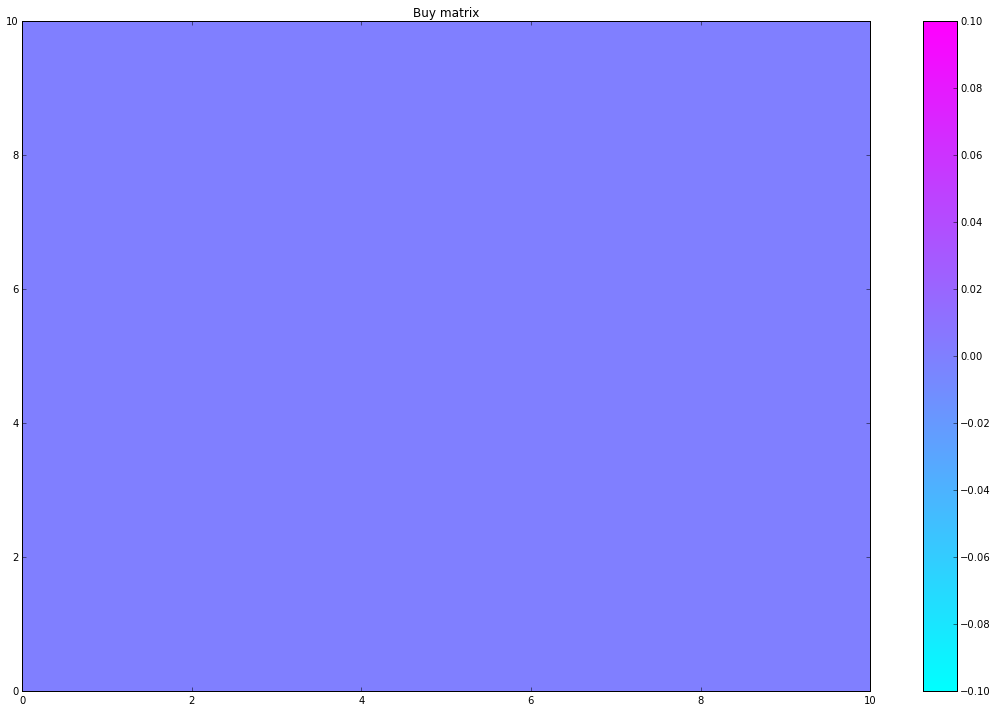

In [14]:
plt.pcolor(buy_sell_mat,cmap=plt.cm.cool)
plt.title("Buy matrix")
plt.colorbar()
plt.show()
plt.close()